In [332]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors

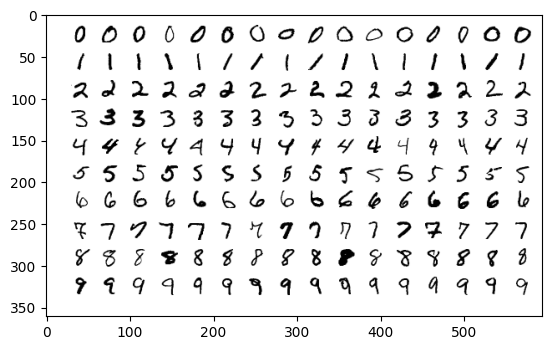

In [333]:
image = cv2.imread('MnistExamples.png')

plt.imshow(image)
plt.show()

In [334]:
# cẳt ảnh để lấy dữ liệu
x = 35
y = 33

# lấy 11 ảnh đầu làm train data và 5 ảnh sau làm test data
train_data = []
train_label = []
test_data = []
test_label = []
for i in range(10):
    for j in range(16):
        if i == 3 or i == 4:
            cropped = image[13+y*i:41+y*i,28+x*j:56+x*j] # cắt ảnh
        elif i >= 7:
            cropped = image[14+y*i:42+y*i,30+x*j:58+x*j] # cắt ảnh
        else:
            cropped = image[10+y*i:38+y*i,29+x*j:57+x*j] # cắt ảnh
        gray = 255 - cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
        if j < 12:
            train_data.append(gray.reshape((1,784)))
            train_label.append(i)
        else:
            test_data.append(gray.reshape((1,784)))
            test_label.append(i)
        #plt.imshow(cropped)
        #plt.axis('off')
        #path = 'number/number' + str(i) +' (' + str(j) + ')'
        #plt.savefig(path)
    

In [335]:
train_data = np.array(train_data)
print(train_data.shape)

test_data = np.array(test_data)
print(test_data.shape)

# train_label = np.array(train_data)
# test_data = np.array(test_label)

(120, 1, 784)
(40, 1, 784)


In [336]:
print(len(train_data))

120


In [337]:
def image_show(i, data, label):
    x = data[i][0] # get the vectorized image
    x = x.reshape((28,28)) # reshape it into 28x28 format
    print('The image label of index %d is %d.' %(i, label[i]))
    plt.imshow(x, cmap='gray') # show the image
    # Hiển thị ảnh
    #cv2.imshow("Hihi", 5*x)
    # waits for user to press any key
    # (this is necessary to avoid Python kernel form crashing)
    #cv2.waitKey(0)

The image label of index 108 is 9.


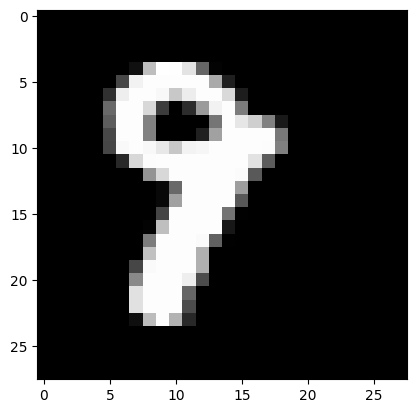

In [338]:
# for i in range(111):
#     image_show(i, train_data, train_label)
#cv2.destroyAllWindows()
image_show(108, train_data, train_label)
#image_show(4, test_data, test_label)

In [339]:
# L2 square distance between two vectorized images x and y
def distance1(x,y):
    return np.sum(np.square(x-y))
# L2 distance between two vectorized images x and y
def distance2(x,y):
    return np.sqrt(np.sum(np.square(x-y)))
# and can be coded as below
def distance3(x,y):
    return np.linalg.norm(x-y)

def kNN(x, k, data, label):
    #create a list of distances between the given image and the images of the training set
    distances =[np.linalg.norm(x-data[i][0]) for i in range(len(data))]
    #distances = [distance1(x,data[i][0]) for i in range(len(data))]
    #Use "np.argpartition". It does not sort the entire array. 
    #It only guarantees that the kth element is in sorted position 
    # and all smaller elements will be moved before it. 
    # Thus the first k elements will be the k-smallest elements.
    idx = np.argpartition(distances, k)
    clas, freq = np.unique(label[idx[:k]], return_counts=True)
    return clas[np.argmax(freq)]

The predicted value is :  9  and the true value is  9
The image label of index 38 is 9.


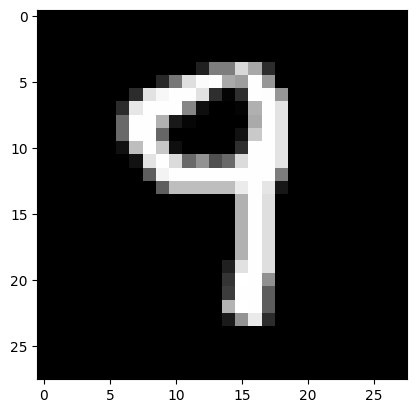

In [340]:
i=38
print('The predicted value is : ', kNN(test_data[i][0], 8, train_data, np.array(train_label)), 
      ' and the true value is ', test_label[i])
image_show(i, test_data, test_label)

In [341]:
def accuracy_set(data, label, train_data, train_label, k):
    cnt = 0
    for x, lab in zip(data,label):
        if kNN(x, k, train_data, train_label) == lab:
            cnt += 1
    return cnt/len(label)

In [342]:
k_acc = [accuracy_set(test_data, test_label, train_data, np.array(train_label), k) for k in range(1,15)]
k_acc

[0.475,
 0.5,
 0.475,
 0.5,
 0.475,
 0.425,
 0.425,
 0.475,
 0.5,
 0.5,
 0.5,
 0.45,
 0.425,
 0.475]

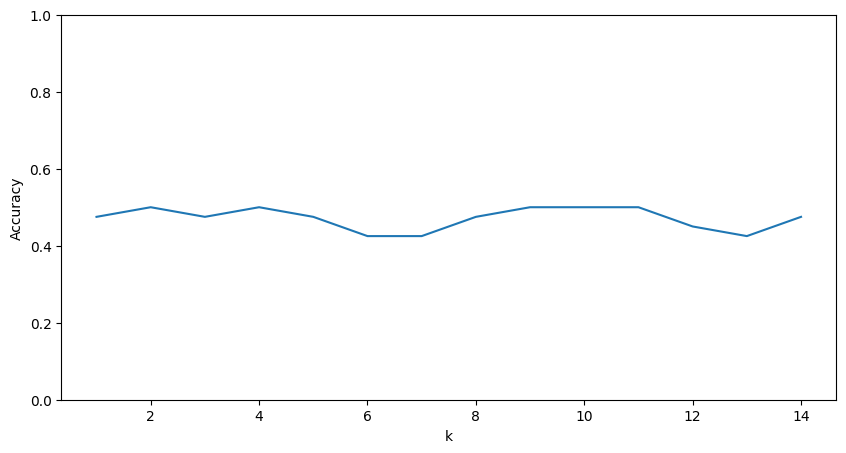

In [343]:
X = [k for k in range(1,15)]
plt.figure(figsize = (10,5))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.plot(X,k_acc)